# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Ricky Nugraha
- **Email:** rickynugraha1215@gmail.com
- **ID Dicoding:** rickynugraha

## Menentukan Pertanyaan Bisnis



1. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
2. Jam berapa banyak orang menggunakan sepeda?




## Import Semua Packages/Library yang Digunakan

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [50]:
day_df = pd.read_csv("https://raw.githubusercontent.com/ricky-codes12/Bike-Sharing-Dataset-Analis/refs/heads/main/archive/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [51]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/ricky-codes12/Bike-Sharing-Dataset-Analis/refs/heads/main/archive/hour.csv")
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv berisi data peminjaman sepeda per hari selama 2 tahun (2011–2012)
- hour.csv berisi data peminjaman sepeda per jam, memberikan detail pola penggunaan dalam satu hari.

### Assessing Data

In [52]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [53]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [54]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [55]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [34]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [35]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Berdasarkan data hasil proses assesing data. Pada data day_df & hour_df terdapat ada kesalahan tipe data yang seharusnya datetime. tetapi ini tipe datanya object
- Untuk data day & hour : nilai semua kolom, sesuai domain dan masuk akal

### Cleaning Data

In [56]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [57]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [58]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [59]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Untuk data hour & day, sudah dibersihkan & tipe data sudah sesuai, sehingga data siap digunakan proses analisis selanjutnya

## Exploratory Data Analysis (EDA)

### Explore ...

In [40]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [41]:
day_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "std"]
})


cnt                               
             max  min         mean          std
weathersit                                     
1           8714  431  4876.786177  1879.483989
2           8362  605  4035.862348  1809.109918
3           4639   22  1803.285714  1240.284449

In [42]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [43]:
hour_df.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean", "std"]
}).sort_values(("cnt", "max"), ascending=False)


cnt                            
    max min        mean         std
hr                                 
18  977  23  425.510989  224.639304
17  976  15  461.452055  232.656611
8   839   5  359.011004  235.189285
16  783  11  311.983562  148.682618
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
19  743  11  311.523352  161.050359
11  663  10  208.143054  127.495536
7   596   1  212.064649  161.441936
21  584   6  172.314560   89.788893
20  567  11  226.030220  119.670164
10  539   8  173.668501  102.205413
22  502   9  131.335165   69.937782
9   426  14  219.309491   93.703458
0   283   2   53.898072   42.307910
23  256   2   87.831044   50.846889
6   213   1   76.044138   55.084348
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
5    66   1   19.889819   13.200765
4    28   1    6.352941    4.143818

**Insight:**
- Pada data day_df : terdapat Cuaca cerah menghasilkan penyewaan sepeda terbanyak, sedangkan 🌧️ cuaca hujan atau salju menyebabkan jumlah penyewaan turun drastis. Cuaca berpengaruh signifikan terhadap jumlah penyewaan.
- Pada data hour_df : Penyewaan sepeda paling tinggi terjadi pukul 17.00 dan 18.00, menunjukkan lonjakan signifikan saat jam pulang kerja. Aktivitas juga cukup tinggi pukul 08.00 pagi saat orang berangkat kerja/sekolah. Sebaliknya, dini hari (01.00–05.00) menunjukkan penyewaan sangat rendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

/tmp/ipython-input-372929700.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


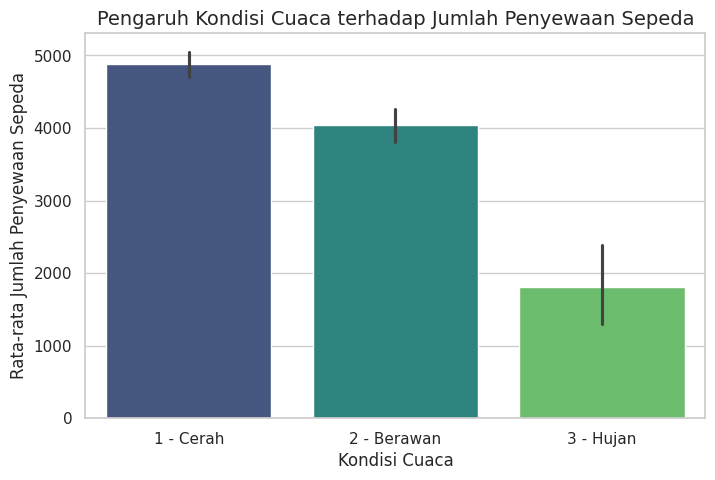

In [44]:
# Set style
sns.set(style="whitegrid")

# Buat visualisasi rata-rata jumlah sewa berdasarkan kondisi cuaca
plt.figure(figsize=(8, 5))
sns.barplot(
    data=day_df,
    x="weathersit",
    y="cnt",
    estimator="mean",
    palette="viridis"
)

# Judul dan label
plt.title("Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda", fontsize=14)
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")

# Ganti label angka jadi deskriptif
plt.xticks(
    ticks=[0, 1, 2],
    labels=["1 - Cerah", "2 - Berawan", "3 - Hujan"]
)

plt.show()

### Pertanyaan 2: Jam berapa banyak orang menggunakan sepeda?

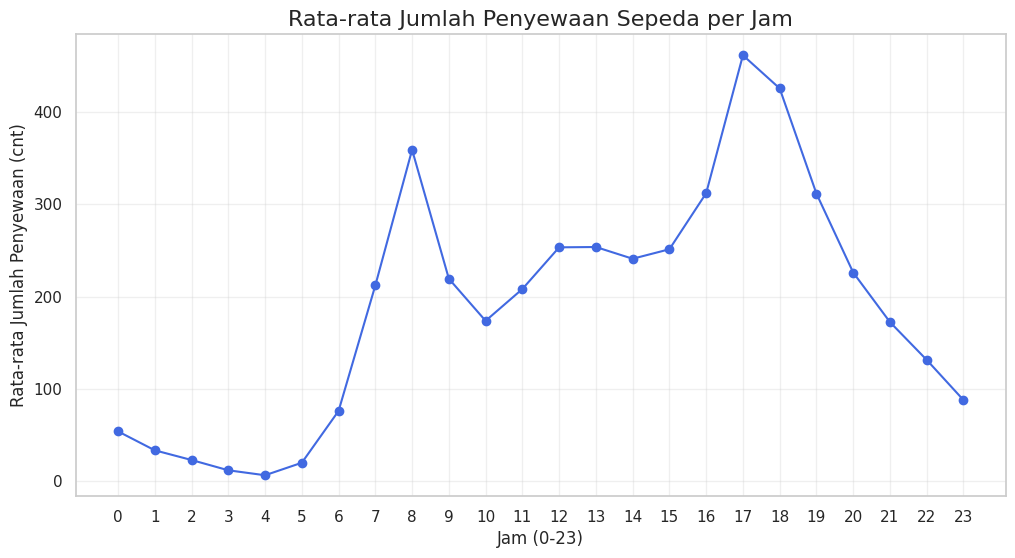

In [45]:
# Kelompokkan data berdasarkan jam
hour_usage = hour_df.groupby('hr')['cnt'].mean()

# Visualisasi
plt.figure(figsize=(12,6))
plt.plot(hour_usage.index, hour_usage.values, marker='o', color='royalblue')

plt.title("Rata-rata Jumlah Penyewaan Sepeda per Jam", fontsize=16)
plt.xlabel("Jam (0-23)", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan (cnt)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(0,24))  # tampilkan semua jam di sumbu x

# Tampilkan grafik
plt.show()

**Insight:**
- Kondisi cuaca sangat memengaruhi jumlah penyewaan sepeda. Penyewaan paling tinggi saat cuaca cerah, menurun saat berawan, dan terendah ketika hujan, karena kondisi cerah lebih nyaman dan aman untuk bersepeda.
- Aktivitas penyewaan sepeda paling tinggi terjadi pada jam 8 pagi dan jam 17–18 sore, yang menunjukkan pola penggunaan sepeda saat berangkat dan pulang kerja/sekolah. Sebaliknya, penggunaan sepeda sangat rendah pada dini hari (jam 0–5).

## Analisis Lanjutan (Opsional)

Pertanyaan RFM :

3. Selisih antara hari terakhir dalam dataset dan hari peminjaman terakhir?
4. Total jumlah jam penyewaan dalam sehari?
5. Total jumlah penyewaan (cnt) pada hari itu?



In [60]:
# Pastikan kolom tanggal bertipe datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Tentukan tanggal referensi (hari terakhir + 1)
ref_date = hour_df['dteday'].max() + pd.Timedelta(days=1)

# Hitung RFM per hari
rfm_day = hour_df.groupby('dteday').agg({
    'hr': 'count',        # Frequency -> jumlah jam penyewaan dalam sehari
    'cnt': 'sum'          # Monetary -> total penyewaan dalam sehari
}).reset_index()

# Hitung Recency secara terpisah
rfm_day['Recency'] = (ref_date - rfm_day['dteday']).dt.days

# Urutkan kolom
rfm_day = rfm_day[['dteday', 'Recency', 'hr', 'cnt']]
rfm_day.columns = ['Tanggal', 'Recency', 'Frequency', 'Monetary']

print(rfm_day.head())

     Tanggal  Recency  Frequency  Monetary
0 2011-01-01      731         24       985
1 2011-01-02      730         23       801
2 2011-01-03      729         22      1349
3 2011-01-04      728         23      1562
4 2011-01-05      727         23      1600


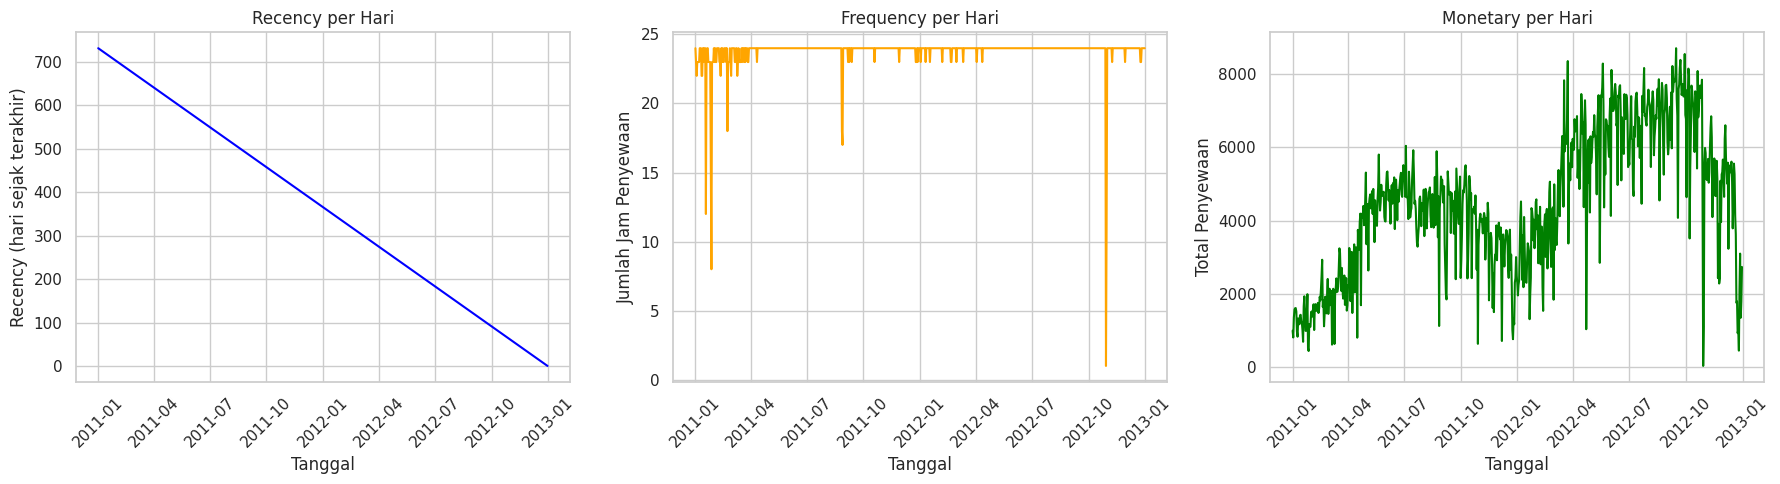

In [47]:

# Visualisasi RFM
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency
axes[0].plot(rfm_day['Tanggal'], rfm_day['Recency'], color='blue')
axes[0].set_title('Recency per Hari')
axes[0].set_xlabel('Tanggal')
axes[0].set_ylabel('Recency (hari sejak terakhir)')
axes[0].tick_params(axis='x', rotation=45)

# Frequency
axes[1].plot(rfm_day['Tanggal'], rfm_day['Frequency'], color='orange')
axes[1].set_title('Frequency per Hari')
axes[1].set_xlabel('Tanggal')
axes[1].set_ylabel('Jumlah Jam Penyewaan')
axes[1].tick_params(axis='x', rotation=45)

# Monetary
axes[2].plot(rfm_day['Tanggal'], rfm_day['Monetary'], color='green')
axes[2].set_title('Monetary per Hari')
axes[2].set_xlabel('Tanggal')
axes[2].set_ylabel('Total Penyewaan')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Conclusion



* Jumlah penyewaan sepeda dipengaruhi oleh kondisi cuaca. Penyewaan tertinggi terjadi saat cuaca cerah, sedikit menurun saat berawan, dan turun drastis saat hujan atau bersalju. Hal ini menunjukkan bahwa orang lebih cenderung menyewa sepeda ketika cuaca mendukung aktivitas di luar ruangan.
* Jumlah penyewaan sepeda bervariasi sepanjang hari. Puncak penyewaan terjadi pada pagi (jam 7–9) dan sore (jam 17–18), kemungkinan terkait dengan aktivitas pergi dan pulang kerja/sekolah. Penyewaan paling rendah terjadi malam hingga dini hari, menunjukkan sedikit minat menggunakan sepeda di waktu tersebut.









In [61]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Gabung berdasarkan tanggal
all_df = pd.merge(hour_df, day_df, on='dteday', suffixes=('_hour', '_day'))

# Simpan ke CSV
all_df.to_csv("all_data.csv", index=False)
print("File CSV berhasil dibuat: all_data.csv")

File CSV berhasil dibuat: all_data.csv


In [62]:
from google.colab import files
files.download("all_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>